# Analysis of BMI as a Risk Factor for Heart Disease

## Data Cleaning

In [29]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Import CSV File
heart_disease_df = pd.read_csv('Resources\heart_2020_cleaned.csv')

# Drop unneeded columns
heart_disease_df = heart_disease_df.drop(columns=['Stroke','PhysicalHealth','MentalHealth','DiffWalking',
                                                  'Race','Diabetic','GenHealth','Asthma','KidneyDisease',
                                                  'SkinCancer'])

# Rename remaining columns for clarity
renamed_df = heart_disease_df.rename(columns={'HeartDisease':'Heart Disease', 'AlcoholDrinking':'Alcohol Drinking', 
                                              'AgeCategory':'Age Category', 'PhysicalActivity':'Physical Activity', 
                                              'SleepTime':'Sleep Time'})

In [3]:
# View first 5 lines of data
renamed_df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time
0,No,16.60,Yes,No,Female,55-59,Yes,5.0
1,No,20.34,No,No,Female,80 or older,Yes,7.0
2,No,26.58,Yes,No,Male,65-69,Yes,8.0
3,No,24.21,No,No,Female,75-79,No,6.0
4,No,23.71,No,No,Female,40-44,Yes,8.0


## Creating BMI Categories and Binning Them

In [4]:
# Find the maximum and minimum BMI scores to determine bin edges
print(renamed_df["BMI"].max())
print(renamed_df["BMI"].min())

94.85
12.02


In [5]:
# Create bins in which to place values based upon BMI value
bmi_bins=[0, 18.49, 24.99, 29.99, 34.99, 39.99, 95]

In [6]:
# Create bin labels based on on CDC's BMI definitions
bmi_labels=['Underweight (less than 18.5)','Healthy Weight (18.5 to 24.9)','Overweight (25 to 29.9)',
            'Class 1 Obese (30 to 34.99)','Class 2 Obese (35 to 39.99)','Class 3 Severely Obese (40+)']

In [7]:
# Slice the data, place it in bins, and create a new column to contain the data series
renamed_df['BMI Category'] = pd.cut(renamed_df["BMI"], bmi_bins, labels=bmi_labels)
renamed_df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time,BMI Category
0,No,16.60,Yes,No,Female,55-59,Yes,5.0,Underweight (less than 18.5)
1,No,20.34,No,No,Female,80 or older,Yes,7.0,Healthy Weight (18.5 to 24.9)
2,No,26.58,Yes,No,Male,65-69,Yes,8.0,Overweight (25 to 29.9)
3,No,24.21,No,No,Female,75-79,No,6.0,Healthy Weight (18.5 to 24.9)
4,No,23.71,No,No,Female,40-44,Yes,8.0,Healthy Weight (18.5 to 24.9)


In [8]:
# Count how many values are in each BMI category for Overview of data
bmi_group = renamed_df.groupby('BMI Category')['BMI Category'].count()
bmi_group

BMI Category
Underweight (less than 18.5)       5110
Healthy Weight (18.5 to 24.9)     97331
Overweight (25 to 29.9)          114512
Class 1 Obese (30 to 34.99)       61345
Class 2 Obese (35 to 39.99)       25112
Class 3 Severely Obese (40+)      16385
Name: BMI Category, dtype: int64

## Data Visualization

In [9]:
bmi_df = renamed_df[['Heart Disease','BMI Category']]
bmi_df.head()

,Heart Disease,BMI Category
0,No,Underweight (less than 18.5)
1,No,Healthy Weight (18.5 to 24.9)
2,No,Overweight (25 to 29.9)
3,No,Healthy Weight (18.5 to 24.9)
4,No,Healthy Weight (18.5 to 24.9)


In [10]:
# Group the DataFrame by 'BMI Category' and 'Heart Disease' and count by yes/no value
bmi_grouped_df = bmi_df.groupby(['BMI Category', 'Heart Disease']).size().unstack()
bmi_grouped_df.head()

Heart Disease,No,Yes
BMI Category,,
Underweight (less than 18.5),4709,401
Healthy Weight (18.5 to 24.9),91022,6309
Overweight (25 to 29.9),104521,9991
Class 1 Obese (30 to 34.99),55185,6160
Class 2 Obese (35 to 39.99),22412,2700


In [11]:
# Calculate the percentage for each row
# axis=1 means sum across columns
# axis=0 means the division should be performed across the rows

# Calculate the percentage for each row
percentages = bmi_grouped_df.div(bmi_grouped_df.sum(axis=1), axis=0) * 100

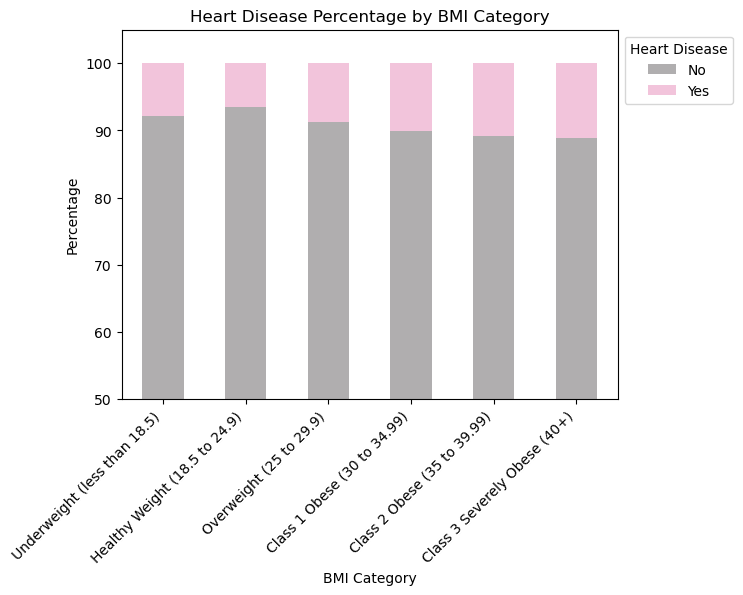

In [26]:
# Define the colors for the bars
colors = ['#b0aeaf', '#f2c4db']

# Plot the stacked bar chart using percentages
fig1 = percentages.plot(kind='bar', stacked=True, color=colors)

# Customize the plot
plt.xlabel('BMI Category')
plt.ylabel('Percentage')
plt.title('Heart Disease Percentage by BMI Category')
plt.legend(title='Heart Disease', loc='upper right')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Set the y-axis limits from 40% to 100%
plt.ylim(50)

# Move the legend outside the chart
plt.legend(title='Heart Disease', bbox_to_anchor=(1, 1), loc='upper left')

# Save the figure as a PNG file
plt.savefig('Visualization/BMI_bar_chart.png', bbox_inches='tight')

# Display the plot
plt.show()

In [13]:
# Round and format the percentages
percentages['Yes'] = percentages['Yes'].round(2).astype(str) + '%'
percentages['No'] = percentages['No'].round(2).astype(str) + '%'
percentages

Heart Disease,No,Yes
BMI Category,,
Underweight (less than 18.5),92.15%,7.85%
Healthy Weight (18.5 to 24.9),93.52%,6.48%
Overweight (25 to 29.9),91.28%,8.72%
Class 1 Obese (30 to 34.99),89.96%,10.04%
Class 2 Obese (35 to 39.99),89.25%,10.75%
Class 3 Severely Obese (40+),88.94%,11.06%


### Resources
https://www.cdc.gov/obesity/basics/adult-defining.html<br>
https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html